# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

pd.options.display.max_rows = 50

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

## Data Cleaning

### loading & exploring Data

In [2]:
re_df = pd.read_excel('Data_MidTerm_Project_Real_State_Regression.xls')

In [3]:
re_df.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [4]:
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [5]:
re_df['date'] = re_df['date'].dt.to_period('M')

In [6]:
re_df['date'] = re_df['date'].dt.strftime('%m/%Y')

In [7]:
re_df['date'].value_counts()

04/2015    2229
07/2014    2211
06/2014    2178
08/2014    1939
10/2014    1876
03/2015    1875
09/2014    1771
05/2014    1768
12/2014    1470
11/2014    1409
02/2015    1247
01/2015     978
05/2015     646
Name: date, dtype: int64

In [8]:
#re_df = re_df[re_df.date != "05/2015"]
#re_df = re_df[re_df.date != "01/2015"]

### droping columns

In [9]:
re_df.drop(['id'],axis=1, inplace=True)
#re_df.drop(['view'],axis=1, inplace=True)
re_df.drop(['yr_renovated'],axis=1, inplace=True)
re_df.drop(['sqft_above'],axis=1, inplace=True)
#re_df.drop(['long'],axis=1, inplace=True)
#re_df.drop(['lat'],axis=1, inplace=True)

### removing duplicates

In [10]:
re_df.drop_duplicates(inplace=True)

### droping nan values

In [11]:
#re_df.view.hist()
#re_df.dropna(inplace=True)
#re_df

### renaming waterfront column features

In [12]:
def clean_waterfront(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'

In [13]:
re_df["waterfront"] = list(map(clean_waterfront,re_df["waterfront"])) 

### changing year renovated

def yr_renovated(x):
    if x == 0:
        return 'no'
    else:
        return 'yes'

re_df["yr_renovated"] = list(map(yr_renovated,re_df["yr_renovated"]))

### removing outliers

#### bedrooms

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

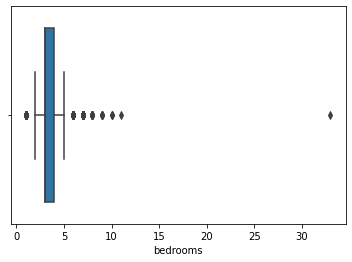

In [14]:
sns.boxplot(re_df['bedrooms'])

In [15]:
max(re_df['bedrooms'])

33

In [16]:
#re_df = re_df[re_df.bedrooms != max(re_df['bedrooms'])]

re_df.loc[re_df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,06/2014,33,1.75,1620,6000,1.0,no,0,5,7,580,1947,98103,47.6878,-122.331,1330,4700,640000


Based on the sqft_living we asume that there is typing error

In [17]:
re_df.at[15856,'bedrooms'] = 3

#### bathrooms

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

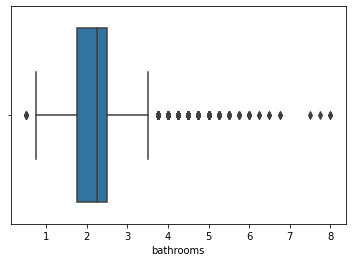

In [18]:
sns.boxplot(re_df['bathrooms'])

In [19]:
re_df['bathrooms'].value_counts()

re_df = re_df[re_df.bathrooms != max(re_df['bathrooms'])]
#re_df = re_df[re_df.bathrooms != 7.75]

#### sqft_lot

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_lot'>

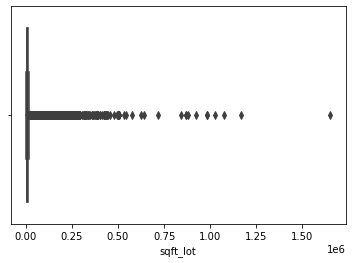

In [20]:
sns.boxplot(re_df['sqft_lot'])

In [21]:
max(re_df['sqft_lot'])

1651359

In [22]:
re_df.loc[re_df['sqft_lot'] == 1651359]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price
1717,03/2015,4,1.0,1300,1651359,1.0,no,3,4,6,0,1920,98022,47.2313,-122.023,2560,425581,700000


In [23]:
re_df.at[1717,'sqft_lot'] = 16513.59

#### price

In [24]:
re_df = re_df[re_df['price'] < 4000000]

## Plot the Correlation Heatmap

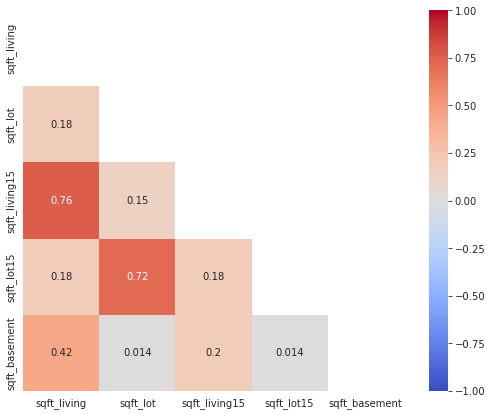

In [25]:
re_num = re_df[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]

corr = re_num.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## Split Data into groups

In [26]:
expensive_zipcodes= [98199, 98119, 98109, 98102, 98105, 98112, 98033, 98039, 98004, 98005, 98040, 98006, 98075]
expensive_areas = re_df[re_df['zipcode'].isin(expensive_zipcodes)]

In [27]:
affordable_areas = re_df[~re_df['zipcode'].isin(expensive_zipcodes)]

## X Y split

In [28]:
X=re_df.drop("price", axis=1)
y=re_df["price"]

## Data Splitting

In [29]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [30]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Data Transformation

### Hot coding Categorical Variables

In [31]:
X_train_cat=X_train[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_train_cat

X_test_cat=X_test[['date','bedrooms','bathrooms','view','floors','waterfront','condition','grade','yr_built','zipcode','lat','long']]
X_test_cat

,date,bedrooms,bathrooms,view,floors,waterfront,condition,grade,yr_built,zipcode,lat,long
12043,03/2015,4,2.25,0,1.0,no,4,8,1972,98052,47.6287,-122.093
2531,05/2014,4,3.00,0,2.0,no,3,10,1998,98075,47.5937,-121.982
4111,05/2014,4,2.00,0,1.0,no,5,7,1956,98005,47.5877,-122.157
12522,02/2015,2,1.75,0,2.0,no,3,9,2010,98102,47.6192,-122.316
8760,07/2014,2,1.00,0,1.0,no,3,6,1939,98108,47.5558,-122.310
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,12/2014,8,5.00,0,2.0,no,3,8,1997,98122,47.6086,-122.303
8554,05/2014,3,2.50,0,2.0,no,3,7,2002,98092,47.3344,-122.174
5714,09/2014,3,3.00,0,1.0,no,4,10,1979,98092,47.3080,-122.087
10234,08/2014,3,2.50,0,2.0,no,3,7,2000,98065,47.5309,-121.876


In [32]:
X_train_cat=pd.get_dummies(X_train_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_train_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_train_cat).get_feature_names(input_features=X_train_cat.columns))

X_test_cat=pd.get_dummies(X_test_cat, drop_first=True)
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(X_test_cat).toarray(),
columns=OneHotEncoder(drop='first').fit(X_test_cat).get_feature_names(input_features=X_test_cat.columns))

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.75,bathrooms_1.0,...,date_05/2014_1,date_05/2015_1,date_06/2014_1,date_07/2014_1,date_08/2014_1,date_09/2014_1,date_10/2014_1,date_11/2014_1,date_12/2014_1,waterfront_yes_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6471,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6472,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_test_cat = X_test_cat.reset_index(drop=True)

### Standardize numerical

In [34]:
X_train_num=X_train[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_train_num

X_test_num=X_test[['sqft_living','sqft_lot','sqft_living15','sqft_lot15','sqft_basement']]
X_test_num

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement
12043,2420,7725,1740,7944,530
2531,3690,9892,3430,11294,0
4111,2250,7500,1440,7500,1050
12522,1170,976,1280,1183,390
8760,1020,7920,1530,6900,0
...,...,...,...,...,...
1658,2800,2580,1800,2580,920
8554,2720,6014,2760,6537,0
5714,3760,188760,2820,50543,1120
10234,1590,4242,1590,3702,0


In [35]:
std_scaler=StandardScaler().fit(X_train_num)   ## finding the parameters (mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train_num)

In [36]:
X_test_scaled=std_scaler.transform(X_test_num)

In [37]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.22558214 -0.20150199 -0.01912935 -0.21436704 -0.65842987]
 [ 1.97617049 -0.00460207  1.50947483  0.07914664  2.8921169 ]
 [-1.32645845 -0.24271865 -0.90101637 -0.27572504 -0.65842987]
 ...
 [-0.6259008  -0.22129081 -1.26112024 -0.24382606  0.11540725]
 [-0.39238158 -0.21890458 -1.29786553 -0.25563119  1.29892284]
 [-0.60366087 -0.33445584 -0.97450695 -0.40791385  0.28383062]]
--------
[[ 0.38601581 -0.1797126  -0.35718604 -0.17407171  0.54784564]
 [ 1.79825108 -0.12748073  2.12679574 -0.05386745 -0.65842987]
 [ 0.19697645 -0.18513585 -0.79812955 -0.19000326  1.73136122]
 ...
 [ 1.87609082  4.18382984  1.2302106   1.35446003  1.89068063]
 [-0.5369411  -0.26366443 -0.57765779 -0.32628259 -0.65842987]
 [ 0.37489585 -0.07908129  1.62705976 -0.03205127  1.18512326]]


In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train_num.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test_num.columns)

In [39]:
X_train_scaled = X_train_scaled.reset_index(drop=True)
X_test_scaled = X_test_scaled.reset_index(drop=True)

### Quantile Transformer

In [40]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_living15'] = qt.transform(X_train_scaled['sqft_living15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_living15'] = qt.transform(X_test_scaled['sqft_living15'].to_numpy().reshape(-1,1))

In [41]:
qt = QuantileTransformer(output_distribution="normal").fit(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_train_scaled['sqft_lot15'] = qt.transform(X_train_scaled['sqft_lot15'].to_numpy().reshape(-1,1))
X_test_scaled['sqft_lot15'] = qt.transform(X_test_scaled['sqft_lot15'].to_numpy().reshape(-1,1))

In [42]:
qt = QuantileTransformer().fit(y_train.to_numpy().reshape(-1,1))
y_train = qt.transform(y_train.to_numpy().reshape(-1,1))
y_test = qt.transform(y_test.to_numpy().reshape(-1,1))

## Concatination 

In [43]:
X_train_con=pd.concat([X_train_scaled,X_train_cat],axis=1)
X_test_con=pd.concat([X_test_scaled,X_test_cat],axis=1)

In [44]:
X_train_con

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_basement,bedrooms,bathrooms,view,floors,condition,...,date_05/2014,date_05/2015,date_06/2014,date_07/2014,date_08/2014,date_09/2014,date_10/2014,date_11/2014,date_12/2014,waterfront_yes
0,-0.225582,-0.201502,0.195700,-0.238864,-0.658430,3,2.50,0,2.0,3,...,0,0,0,1,0,0,0,0,0,0
1,1.976170,-0.004602,1.381364,1.159764,2.892117,5,3.00,0,1.0,4,...,0,0,0,0,1,0,0,0,0,0
2,-1.326458,-0.242719,-0.955471,-0.668483,-0.658430,2,1.00,0,1.0,3,...,0,0,0,0,0,0,0,0,1,0
3,-0.648141,-0.190559,-0.828465,-0.111890,0.251967,3,1.50,0,1.0,3,...,0,0,0,0,0,0,0,0,1,0
4,-0.881660,-0.203792,-0.357496,-0.748009,-0.658430,3,1.00,0,1.0,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15102,1.208893,0.223102,2.278884,0.934816,1.617562,3,2.50,3,1.0,3,...,0,0,0,0,0,1,0,0,0,0
15103,1.186653,-0.099593,1.100140,0.830136,-0.658430,4,2.50,0,2.0,3,...,0,0,0,0,0,0,0,1,0,0
15104,-0.625901,-0.221291,-1.679303,-0.422483,0.115407,3,1.00,0,1.0,3,...,0,0,0,0,0,0,0,0,0,0
15105,-0.392382,-0.218905,-1.756055,-0.513926,1.298923,4,2.00,0,1.0,4,...,0,0,0,0,1,0,0,0,0,0


##  Apply Linear Regression

### Modelling using Statsmodels

In [45]:
X_train_const_scaled = sm.add_constant(X_train_con) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_con) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1527.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:14:21   Log-Likelihood:                 7488.4
No. Observations:               15107   AIC:                        -1.492e+04
Df Residuals:                   15078   BIC:                        -1.470e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.0806      2.602     -1.

In [46]:
predictions_test

0       0.627002
1       0.859166
2       0.508076
3       0.500733
4       0.249841
          ...   
6470    0.637967
6471    0.298087
6472    0.691926
6473    0.342759
6474    0.540261
Length: 6475, dtype: float64

In [47]:
#display adjusted R-squared
print(model.rsquared_adj)

0.7388434332828067


### Modeling using Scikit Learn

In [48]:
model=LinearRegression()    # model
model.fit(X_train_con, y_train)   # model train

LinearRegression()

In [49]:
model.coef_

array([[ 6.20138841e-02,  2.05441637e-02,  5.88959633e-02,
        -3.53584009e-02, -3.03690121e-04, -2.02283376e-03,
         2.66739071e-02,  2.46849683e-02,  2.82891012e-02,
         3.61214756e-02,  8.34740098e-02, -2.07429725e-03,
        -3.02643819e-04,  8.36071124e-01,  1.04668906e-02,
         6.74872031e-03,  3.04820405e-02,  3.45378747e-02,
        -3.61703188e-03,  3.93627032e-02,  5.81765512e-03,
         6.00545825e-03, -3.18453910e-03,  3.49194202e-03,
        -2.00037872e-03, -6.39350774e-03, -1.16065644e-02,
         1.14741467e-01]])

In [50]:
model.intercept_

array([-5.08061377])

Making prediction

In [51]:
y_pred=model.predict(X_test_con)   # model prediction
##y_pred_train=model.predict(X_train_scaled)

In [52]:
y_test

array([[0.76326326],
       [0.89189189],
       [0.64864865],
       ...,
       [0.65665666],
       [0.32332332],
       [0.56306306]])

In [53]:
y_pred

array([[0.62700229],
       [0.85916617],
       [0.50807614],
       ...,
       [0.69192642],
       [0.34275935],
       [0.54026142]])

In [57]:
y_test = y_test.reshape(len(y_test))
list(y_test)

[0.7632632632632632,
 0.8918918918918919,
 0.6486486486486487,
 0.6196196196196196,
 0.08408408408408408,
 0.4069069069069069,
 0.04354354354354355,
 0.15583438762246707,
 0.3203203203203203,
 0.4239239239239239,
 0.992992992992993,
 0.8989505847832908,
 0.05955955955955956,
 0.39289289289289286,
 0.14667298877825194,
 0.6605759148979488,
 0.9129129129129129,
 0.501001001001001,
 0.537037037037037,
 0.6016016016016016,
 0.9926593259926594,
 0.7702702702702702,
 0.27127127127127126,
 0.43243243243243246,
 0.2652652652652653,
 0.5878729296071316,
 0.7418418418418419,
 0.6306306306306306,
 0.597097097097097,
 0.7186346609956066,
 0.22972972972972971,
 0.9965576592082616,
 0.14964964964964966,
 0.06306306306306306,
 0.9083083083083082,
 0.05555555555555555,
 0.6876876876876876,
 0.0995995995995996,
 0.858058058058058,
 0.43243243243243246,
 0.3718718718718719,
 0.13063063063063063,
 0.7157157157157157,
 0.8858858858858859,
 0.7832832832832832,
 0.7912912912912913,
 0.8573573573573574,
 0.3

In [58]:
y_pred = y_pred.reshape(len(y_pred))
list(y_pred)

[0.6270022888961906,
 0.8591661659213523,
 0.5080761357778663,
 0.5007333610890248,
 0.24984124046721856,
 0.49130565643694624,
 0.047193879404415995,
 0.161148176567532,
 0.22805725809003086,
 0.5376557032121481,
 1.267767515358683,
 0.6494659528641096,
 0.21942168319398458,
 0.30056235669299536,
 0.2637418132645166,
 0.7775160916717514,
 0.8504599026443902,
 0.4769102348692371,
 0.66668711356541,
 0.693400008943728,
 1.1118993473946803,
 0.8441330565350205,
 0.12303330680654234,
 0.5192458734423457,
 0.4748810381440194,
 0.5173116594245721,
 0.6278430150186605,
 0.6225425684187869,
 0.6199105810290426,
 0.6716372590521562,
 0.16607559640651726,
 1.1328921244268049,
 0.4205617734026106,
 0.21232984379436992,
 0.9435353397078661,
 0.1298370785622236,
 0.5139073903489955,
 0.507598462026877,
 0.6868801138865868,
 0.3032734260974532,
 0.39532295192604927,
 0.3068419756779628,
 0.5623816514552136,
 0.7246706387650939,
 0.5260514806124563,
 0.792751754270502,
 1.0162680681518141,
 0.514554

In [59]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
0,0.763263,0.627002
1,0.891892,0.859166
2,0.648649,0.508076
3,0.619620,0.500733
4,0.084084,0.249841
...,...,...
6470,0.563063,0.637967
6471,0.206206,0.298087
6472,0.656657,0.691926
6473,0.323323,0.342759


Linear Regression Train-test split. Standardize the data (after the data split). Apply linear regression. Model Interpretation. Model Validation Model Evaluation: MSE. RMSE. MAE. R2. Adjusted R2. Feature Importance.

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

#### Error metrics

In [ ]:
print(mse(y_test,y_pred))
print(mae(y_test,y_pred))

In [ ]:
R2=r2_score(y_test,y_pred)
R2

In [ ]:
X_test.shape[1]

In [ ]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

#### Feature Importance

In [ ]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train_con.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance')

In [ ]:
features_importances

In [ ]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### Evaluating predictions

In [ ]:
# MAE: mean absolute error
MAE = np.mean( np.abs( y_test - y_pred ) )
MAE

In [ ]:
# MSE: mean squared error
MSE = np.mean( np.power( y_test - y_pred , 2 ) )
MSE

In [ ]:
# RMSE: root mean squared error
RMSE = np.sqrt(MSE)
RMSE

In [ ]:
re_df.hist(figsize=(12,12))